In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import exp
from tqdm import tqdm_notebook

In [2]:
from guess_query import GuessQueryProblem

In [134]:
%load_ext autoreload

In [3]:
cost_of_wrong = GuessQueryProblem(discount_factor=0.99,
                             guess_correct_reward = 1,
                             guess_wrong_cost = 0.5,
                             query_cost = 0,
                             N = 1001,
                             convergence_tol = 10e-5)


In [4]:
cost_of_wrong.solve()

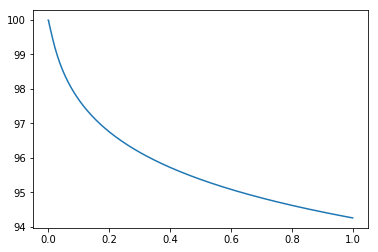

In [5]:
plt.plot(cost_of_wrong.discretization, cost_of_wrong.expected_value_function)

In [6]:
# Looks basically the same--but do we get the same kinda threshold policy?

In [7]:
# Want to do lots of numerical exploration -> Would pay to speed up simulation...
# Check how much worse it gets with lower convergence tolerance or less discretization?

In [8]:
agi = cost_of_wrong.always_guess_index()

In [9]:
agi

14

In [12]:
# Does this agree with my formula?
((1 - 0.5) / (1 + 0.5)) * 4 * (1 - 0.99) / 0.99

0.01346801346801348

In [ ]:
# Hell yeah!!!!!!

In [11]:
cost_of_wrong.p_of_i(agi)

0.014

In [13]:
reward_of_wrong = GuessQueryProblem(discount_factor=0.99,
                             guess_correct_reward = 1,
                             guess_wrong_cost = -0.5,
                             query_cost = 0,
                             N = 1001,
                             convergence_tol = 10e-5)

In [14]:
reward_of_wrong.solve()

In [15]:
((1 + 0.5) / (1 - 0.5)) * 4 * (1 - 0.99) / 0.99

0.12121212121212133

In [16]:
agi2 = reward_of_wrong.always_guess_index()

In [17]:
agi2

122

In [71]:
cost_of_wrong_crappy = GuessQueryProblem(discount_factor=0.99,
                             guess_correct_reward = 1,
                             guess_wrong_cost = 0.5,
                             query_cost = 0,
                             N = 101,
                             convergence_tol = 10e-5)


In [72]:
cost_of_wrong_crappy.solve()

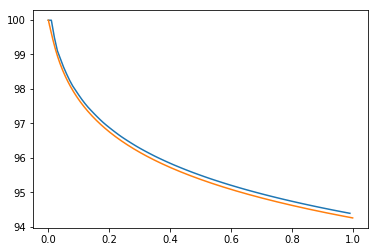

In [73]:
cost_of_wrong_crappy.plot(cost_of_wrong_crappy.expected_value_function, slice(0, -1))
cost_of_wrong.plot(cost_of_wrong.expected_value_function, slice(0, -1))

In [39]:
# That's not bad!
# Let's make a simulation grid. 

In [67]:
# It's strange that a slightly lower convergence tolerance compensates...

In [ ]:
# Still, I prefer making sure the result is as close to right as possible.

In [ ]:
# Let's grid out the cost of mistake r, as well as the beta parameter.

In [106]:
rs = np.asarray(list(np.linspace(-1, 1, 11)) + list( np.logspace(1, 3, 11)))

In [107]:
rs

array([-1.00000000e+00, -8.00000000e-01, -6.00000000e-01, -4.00000000e-01,
       -2.00000000e-01,  0.00000000e+00,  2.00000000e-01,  4.00000000e-01,
        6.00000000e-01,  8.00000000e-01,  1.00000000e+00,  1.00000000e+01,
        1.58489319e+01,  2.51188643e+01,  3.98107171e+01,  6.30957344e+01,
        1.00000000e+02,  1.58489319e+02,  2.51188643e+02,  3.98107171e+02,
        6.30957344e+02,  1.00000000e+03])

In [108]:
discounts = 1 - np.asarray( list(np.logspace(-3, -1, 11)) + list(np.linspace(0.1, 0.9, 9)))

In [109]:
discounts

array([0.999     , 0.99841511, 0.99748811, 0.99601893, 0.99369043,
       0.99      , 0.98415107, 0.97488114, 0.96018928, 0.93690427,
       0.9       , 0.9       , 0.8       , 0.7       , 0.6       ,
       0.5       , 0.4       , 0.3       , 0.2       , 0.1       ])

In [110]:
problems = {(r, discount):GuessQueryProblem(discount_factor=discount,
                             guess_correct_reward = 1,
                             guess_wrong_cost = r,
                             query_cost = 0,
                             N = 101,
                             convergence_tol = 10e-5)
for r in rs for discount in discounts}

In [111]:
len(problems)

418

In [112]:
# That's a big hecking grid, but alright, here we go.
for params, problem in tqdm_notebook(problems.items()):
    print(params)
    problem.solve() 

(-1.0, 0.999)


(-1.0, 0.9984151068075389)


(-1.0, 0.9974881135684904)


(-1.0, 0.996018928294465)


(-1.0, 0.993690426555198)


(-1.0, 0.99)


(-1.0, 0.9841510680753889)


(-1.0, 0.9748811356849042)


(-1.0, 0.9601892829446502)


(-1.0, 0.9369042655519807)


(-1.0, 0.9)


(-1.0, 0.8)


(-1.0, 0.7)


(-1.0, 0.6)


(-1.0, 0.5)


(-1.0, 0.4)


(-1.0, 0.29999999999999993)


(-1.0, 0.19999999999999996)


(-1.0, 0.09999999999999998)


(-0.8, 0.999)


(-0.8, 0.9984151068075389)


(-0.8, 0.9974881135684904)


(-0.8, 0.996018928294465)


(-0.8, 0.993690426555198)


(-0.8, 0.99)


(-0.8, 0.9841510680753889)


(-0.8, 0.9748811356849042)


(-0.8, 0.9601892829446502)


(-0.8, 0.9369042655519807)


(-0.8, 0.9)


(-0.8, 0.8)


(-0.8, 0.7)


(-0.8, 0.6)


(-0.8, 0.5)


(-0.8, 0.4)


(-0.8, 0.29999999999999993)


(-0.8, 0.19999999999999996)


(-0.8, 0.09999999999999998)


(-0.6, 0.999)


(-0.6, 0.9984151068075389)


(-0.6, 0.9974881135684904)


(-0.6, 0.996018928294465)


(-0.6, 0.993690426555198)


(-0.6, 0.99)


(-0.6, 0.9841510680753889)


(-0.6, 0.9748811356849042)


(-0.6, 0.9601892829446502)


(-0.6, 0.9369042655519807)


(-0.6, 0.9)


(-0.6, 0.8)


(-0.6, 0.7)


(-0.6, 0.6)


(-0.6, 0.5)


(-0.6, 0.4)


(-0.6, 0.29999999999999993)


(-0.6, 0.19999999999999996)


(-0.6, 0.09999999999999998)


(-0.3999999999999999, 0.999)


(-0.3999999999999999, 0.9984151068075389)


(-0.3999999999999999, 0.9974881135684904)


(-0.3999999999999999, 0.996018928294465)


(-0.3999999999999999, 0.993690426555198)


(-0.3999999999999999, 0.99)


(-0.3999999999999999, 0.9841510680753889)


(-0.3999999999999999, 0.9748811356849042)


(-0.3999999999999999, 0.9601892829446502)


(-0.3999999999999999, 0.9369042655519807)


(-0.3999999999999999, 0.9)


(-0.3999999999999999, 0.8)


(-0.3999999999999999, 0.7)


(-0.3999999999999999, 0.6)


(-0.3999999999999999, 0.5)


(-0.3999999999999999, 0.4)


(-0.3999999999999999, 0.29999999999999993)


(-0.3999999999999999, 0.19999999999999996)


(-0.3999999999999999, 0.09999999999999998)


(-0.19999999999999996, 0.999)


(-0.19999999999999996, 0.9984151068075389)


(-0.19999999999999996, 0.9974881135684904)


(-0.19999999999999996, 0.996018928294465)


(-0.19999999999999996, 0.993690426555198)


(-0.19999999999999996, 0.99)


(-0.19999999999999996, 0.9841510680753889)


(-0.19999999999999996, 0.9748811356849042)


(-0.19999999999999996, 0.9601892829446502)


(-0.19999999999999996, 0.9369042655519807)


(-0.19999999999999996, 0.9)


(-0.19999999999999996, 0.8)


(-0.19999999999999996, 0.7)


(-0.19999999999999996, 0.6)


(-0.19999999999999996, 0.5)


(-0.19999999999999996, 0.4)


(-0.19999999999999996, 0.29999999999999993)


(-0.19999999999999996, 0.19999999999999996)


(-0.19999999999999996, 0.09999999999999998)


(0.0, 0.999)


(0.0, 0.9984151068075389)


(0.0, 0.9974881135684904)


(0.0, 0.996018928294465)


(0.0, 0.993690426555198)


(0.0, 0.99)


(0.0, 0.9841510680753889)


(0.0, 0.9748811356849042)


(0.0, 0.9601892829446502)


(0.0, 0.9369042655519807)


(0.0, 0.9)


(0.0, 0.8)


(0.0, 0.7)


(0.0, 0.6)


(0.0, 0.5)


(0.0, 0.4)


(0.0, 0.29999999999999993)


(0.0, 0.19999999999999996)


(0.0, 0.09999999999999998)


(0.20000000000000018, 0.999)


(0.20000000000000018, 0.9984151068075389)


(0.20000000000000018, 0.9974881135684904)


(0.20000000000000018, 0.996018928294465)


(0.20000000000000018, 0.993690426555198)


(0.20000000000000018, 0.99)


(0.20000000000000018, 0.9841510680753889)


(0.20000000000000018, 0.9748811356849042)


(0.20000000000000018, 0.9601892829446502)


(0.20000000000000018, 0.9369042655519807)


(0.20000000000000018, 0.9)


(0.20000000000000018, 0.8)


(0.20000000000000018, 0.7)


(0.20000000000000018, 0.6)


(0.20000000000000018, 0.5)


(0.20000000000000018, 0.4)


(0.20000000000000018, 0.29999999999999993)


(0.20000000000000018, 0.19999999999999996)


(0.20000000000000018, 0.09999999999999998)


(0.40000000000000013, 0.999)


(0.40000000000000013, 0.9984151068075389)


(0.40000000000000013, 0.9974881135684904)


(0.40000000000000013, 0.996018928294465)


(0.40000000000000013, 0.993690426555198)


(0.40000000000000013, 0.99)


(0.40000000000000013, 0.9841510680753889)


(0.40000000000000013, 0.9748811356849042)


(0.40000000000000013, 0.9601892829446502)


(0.40000000000000013, 0.9369042655519807)


(0.40000000000000013, 0.9)


(0.40000000000000013, 0.8)


(0.40000000000000013, 0.7)


(0.40000000000000013, 0.6)


(0.40000000000000013, 0.5)


(0.40000000000000013, 0.4)


(0.40000000000000013, 0.29999999999999993)


(0.40000000000000013, 0.19999999999999996)


(0.40000000000000013, 0.09999999999999998)


(0.6000000000000001, 0.999)


(0.6000000000000001, 0.9984151068075389)


(0.6000000000000001, 0.9974881135684904)


(0.6000000000000001, 0.996018928294465)


(0.6000000000000001, 0.993690426555198)


(0.6000000000000001, 0.99)


(0.6000000000000001, 0.9841510680753889)


(0.6000000000000001, 0.9748811356849042)


(0.6000000000000001, 0.9601892829446502)


(0.6000000000000001, 0.9369042655519807)


(0.6000000000000001, 0.9)


(0.6000000000000001, 0.8)


(0.6000000000000001, 0.7)


(0.6000000000000001, 0.6)


(0.6000000000000001, 0.5)


(0.6000000000000001, 0.4)


(0.6000000000000001, 0.29999999999999993)


(0.6000000000000001, 0.19999999999999996)


(0.6000000000000001, 0.09999999999999998)


(0.8, 0.999)


(0.8, 0.9984151068075389)


(0.8, 0.9974881135684904)


(0.8, 0.996018928294465)


(0.8, 0.993690426555198)


(0.8, 0.99)


(0.8, 0.9841510680753889)


(0.8, 0.9748811356849042)


(0.8, 0.9601892829446502)


(0.8, 0.9369042655519807)


(0.8, 0.9)


(0.8, 0.8)


(0.8, 0.7)


(0.8, 0.6)


(0.8, 0.5)


(0.8, 0.4)


(0.8, 0.29999999999999993)


(0.8, 0.19999999999999996)


(0.8, 0.09999999999999998)


(1.0, 0.999)


(1.0, 0.9984151068075389)


(1.0, 0.9974881135684904)


(1.0, 0.996018928294465)


(1.0, 0.993690426555198)


(1.0, 0.99)


(1.0, 0.9841510680753889)


(1.0, 0.9748811356849042)


(1.0, 0.9601892829446502)


(1.0, 0.9369042655519807)


(1.0, 0.9)


(1.0, 0.8)


(1.0, 0.7)


(1.0, 0.6)


(1.0, 0.5)


(1.0, 0.4)


(1.0, 0.29999999999999993)


(1.0, 0.19999999999999996)


(1.0, 0.09999999999999998)


(10.0, 0.999)


(10.0, 0.9984151068075389)


(10.0, 0.9974881135684904)


(10.0, 0.996018928294465)


(10.0, 0.993690426555198)


(10.0, 0.99)


(10.0, 0.9841510680753889)


(10.0, 0.9748811356849042)


(10.0, 0.9601892829446502)


(10.0, 0.9369042655519807)


(10.0, 0.9)


(10.0, 0.8)


(10.0, 0.7)


(10.0, 0.6)


(10.0, 0.5)


(10.0, 0.4)


(10.0, 0.29999999999999993)


(10.0, 0.19999999999999996)


(10.0, 0.09999999999999998)


(15.848931924611133, 0.999)


(15.848931924611133, 0.9984151068075389)


(15.848931924611133, 0.9974881135684904)


(15.848931924611133, 0.996018928294465)


(15.848931924611133, 0.993690426555198)


(15.848931924611133, 0.99)


(15.848931924611133, 0.9841510680753889)


(15.848931924611133, 0.9748811356849042)


(15.848931924611133, 0.9601892829446502)


(15.848931924611133, 0.9369042655519807)


(15.848931924611133, 0.9)


(15.848931924611133, 0.8)


(15.848931924611133, 0.7)


(15.848931924611133, 0.6)


(15.848931924611133, 0.5)


(15.848931924611133, 0.4)


(15.848931924611133, 0.29999999999999993)


(15.848931924611133, 0.19999999999999996)


(15.848931924611133, 0.09999999999999998)


(25.118864315095795, 0.999)


(25.118864315095795, 0.9984151068075389)


(25.118864315095795, 0.9974881135684904)


(25.118864315095795, 0.996018928294465)


(25.118864315095795, 0.993690426555198)


(25.118864315095795, 0.99)


(25.118864315095795, 0.9841510680753889)


(25.118864315095795, 0.9748811356849042)


(25.118864315095795, 0.9601892829446502)


(25.118864315095795, 0.9369042655519807)


(25.118864315095795, 0.9)


(25.118864315095795, 0.8)


(25.118864315095795, 0.7)


(25.118864315095795, 0.6)


(25.118864315095795, 0.5)


(25.118864315095795, 0.4)


(25.118864315095795, 0.29999999999999993)


(25.118864315095795, 0.19999999999999996)


(25.118864315095795, 0.09999999999999998)


(39.810717055349734, 0.999)


(39.810717055349734, 0.9984151068075389)


(39.810717055349734, 0.9974881135684904)


(39.810717055349734, 0.996018928294465)


(39.810717055349734, 0.993690426555198)


(39.810717055349734, 0.99)


(39.810717055349734, 0.9841510680753889)


(39.810717055349734, 0.9748811356849042)


(39.810717055349734, 0.9601892829446502)


(39.810717055349734, 0.9369042655519807)


(39.810717055349734, 0.9)


(39.810717055349734, 0.8)


(39.810717055349734, 0.7)


(39.810717055349734, 0.6)


(39.810717055349734, 0.5)


(39.810717055349734, 0.4)


(39.810717055349734, 0.29999999999999993)


(39.810717055349734, 0.19999999999999996)


(39.810717055349734, 0.09999999999999998)


(63.09573444801933, 0.999)


(63.09573444801933, 0.9984151068075389)


(63.09573444801933, 0.9974881135684904)


(63.09573444801933, 0.996018928294465)


(63.09573444801933, 0.993690426555198)


(63.09573444801933, 0.99)


(63.09573444801933, 0.9841510680753889)


(63.09573444801933, 0.9748811356849042)


(63.09573444801933, 0.9601892829446502)


(63.09573444801933, 0.9369042655519807)


(63.09573444801933, 0.9)


(63.09573444801933, 0.8)


(63.09573444801933, 0.7)


(63.09573444801933, 0.6)


(63.09573444801933, 0.5)


(63.09573444801933, 0.4)


(63.09573444801933, 0.29999999999999993)


(63.09573444801933, 0.19999999999999996)


(63.09573444801933, 0.09999999999999998)


(100.0, 0.999)


(100.0, 0.9984151068075389)


(100.0, 0.9974881135684904)


(100.0, 0.996018928294465)


(100.0, 0.993690426555198)


(100.0, 0.99)


(100.0, 0.9841510680753889)


(100.0, 0.9748811356849042)


(100.0, 0.9601892829446502)


(100.0, 0.9369042655519807)


(100.0, 0.9)


(100.0, 0.8)


(100.0, 0.7)


(100.0, 0.6)


(100.0, 0.5)


(100.0, 0.4)


(100.0, 0.29999999999999993)


(100.0, 0.19999999999999996)


(100.0, 0.09999999999999998)


(158.48931924611142, 0.999)


(158.48931924611142, 0.9984151068075389)


(158.48931924611142, 0.9974881135684904)


(158.48931924611142, 0.996018928294465)


(158.48931924611142, 0.993690426555198)


(158.48931924611142, 0.99)


(158.48931924611142, 0.9841510680753889)


(158.48931924611142, 0.9748811356849042)


(158.48931924611142, 0.9601892829446502)


(158.48931924611142, 0.9369042655519807)


(158.48931924611142, 0.9)


(158.48931924611142, 0.8)


(158.48931924611142, 0.7)


(158.48931924611142, 0.6)


(158.48931924611142, 0.5)


(158.48931924611142, 0.4)


(158.48931924611142, 0.29999999999999993)


(158.48931924611142, 0.19999999999999996)


(158.48931924611142, 0.09999999999999998)


(251.18864315095823, 0.999)


(251.18864315095823, 0.9984151068075389)


(251.18864315095823, 0.9974881135684904)


(251.18864315095823, 0.996018928294465)


(251.18864315095823, 0.993690426555198)


(251.18864315095823, 0.99)


(251.18864315095823, 0.9841510680753889)


(251.18864315095823, 0.9748811356849042)


(251.18864315095823, 0.9601892829446502)


(251.18864315095823, 0.9369042655519807)


(251.18864315095823, 0.9)


(251.18864315095823, 0.8)


(251.18864315095823, 0.7)


(251.18864315095823, 0.6)


(251.18864315095823, 0.5)


(251.18864315095823, 0.4)


(251.18864315095823, 0.29999999999999993)


(251.18864315095823, 0.19999999999999996)


(251.18864315095823, 0.09999999999999998)


(398.1071705534973, 0.999)


(398.1071705534973, 0.9984151068075389)


(398.1071705534973, 0.9974881135684904)


(398.1071705534973, 0.996018928294465)


(398.1071705534973, 0.993690426555198)


(398.1071705534973, 0.99)


(398.1071705534973, 0.9841510680753889)


(398.1071705534973, 0.9748811356849042)


(398.1071705534973, 0.9601892829446502)


(398.1071705534973, 0.9369042655519807)


(398.1071705534973, 0.9)


(398.1071705534973, 0.8)


(398.1071705534973, 0.7)


(398.1071705534973, 0.6)


(398.1071705534973, 0.5)


(398.1071705534973, 0.4)


(398.1071705534973, 0.29999999999999993)


(398.1071705534973, 0.19999999999999996)


(398.1071705534973, 0.09999999999999998)


(630.957344480193, 0.999)


(630.957344480193, 0.9984151068075389)


(630.957344480193, 0.9974881135684904)


(630.957344480193, 0.996018928294465)


(630.957344480193, 0.993690426555198)


(630.957344480193, 0.99)


(630.957344480193, 0.9841510680753889)


(630.957344480193, 0.9748811356849042)


(630.957344480193, 0.9601892829446502)


(630.957344480193, 0.9369042655519807)


(630.957344480193, 0.9)


(630.957344480193, 0.8)


(630.957344480193, 0.7)


(630.957344480193, 0.6)


(630.957344480193, 0.5)


(630.957344480193, 0.4)


(630.957344480193, 0.29999999999999993)


(630.957344480193, 0.19999999999999996)


(630.957344480193, 0.09999999999999998)


(1000.0, 0.999)


(1000.0, 0.9984151068075389)


(1000.0, 0.9974881135684904)


(1000.0, 0.996018928294465)


(1000.0, 0.993690426555198)


(1000.0, 0.99)


(1000.0, 0.9841510680753889)


(1000.0, 0.9748811356849042)


(1000.0, 0.9601892829446502)


(1000.0, 0.9369042655519807)


(1000.0, 0.9)


(1000.0, 0.8)


(1000.0, 0.7)


(1000.0, 0.6)


(1000.0, 0.5)


(1000.0, 0.4)


(1000.0, 0.29999999999999993)


(1000.0, 0.19999999999999996)


(1000.0, 0.09999999999999998)


In [113]:
r_grid, discount_grid = np.meshgrid(rs, discounts)

In [124]:
r_grid.shape

(20, 22)

In [120]:
problem_grid = np.asarray([[problems[(r, discount)] for r in rs] for discount in discounts])

In [122]:
problem_grid.shape

(20, 22)

In [142]:
%autoreload

In [152]:
vectorized_agi = np.vectorize(lambda p : p.p_of_i(p.always_guess_index()))

In [143]:
always_guess_grid = np.vectorize(lambda p : p.p_of_i(p.always_guess_index()))(problem_grid)

In [150]:
from mpl_toolkits import mplot3d


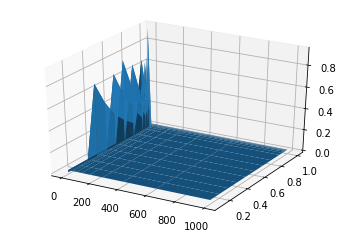

In [151]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(r_grid, discount_grid, always_guess_grid)
# COol!!

In [158]:
problem_line = np.asarray([problems[(0, discount)] for discount in discounts])


In [159]:
problem_line

array([<guess_query.GuessQueryProblem object at 0x1022180a90>,
      dtype=object)

In [160]:
always_guess_line = vectorized_agi(problem_line)

In [161]:
always_guess_line

array([0.02, 0.02, 0.02, 0.02, 0.02, 0.06, 0.06, 0.12, 0.18, 0.28, 0.46,
       0.46, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

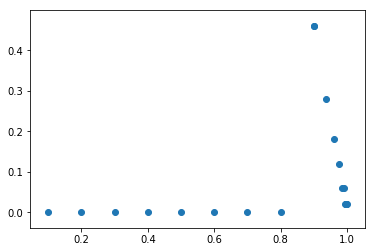

In [168]:
plt.scatter(discounts, always_guess_line)

In [169]:
discounts

array([0.999     , 0.99841511, 0.99748811, 0.99601893, 0.99369043,
       0.99      , 0.98415107, 0.97488114, 0.96018928, 0.93690427,
       0.9       , 0.9       , 0.8       , 0.7       , 0.6       ,
       0.5       , 0.4       , 0.3       , 0.2       , 0.1       ])

In [ ]:
# I see--we're reaching the limits of the discretization here... interesting. Cuz we only have 100 points. :/ 